<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/4_exercicio_probabilidade_amostragem/exercicio_probabilidade_amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios de Probabilidade e Amostragem

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

## Dado

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Probabilidade & Amostragem/populacao_brasileira.csv', index_col=0)
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


## Questões

### 1.
Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [3]:
total_pessoas = len(df)

total_fluentes = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

prob_complementar = 1 - (total_fluentes / total_pessoas)

print(f'Probabilidade de uma pessoa não ser fluente em inglês é de {prob_complementar:.2f}.')

Probabilidade de uma pessoa não ser fluente em inglês é de 0.66.


### 2.
Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [4]:
total_al_pa = df.query('estado == "AL" or estado == "PA"').shape[0]
total_al_pa_renda_acima_5 = df.query('estado == "AL" or estado == "PA" and renda > 5000').shape[0]

prob_al_pa_renda_acima_5 = total_al_pa_renda_acima_5 / total_al_pa

print(f'Probabilidade de uma pessoa ser de Alagoas ou Pará e ter renda acima de 5 mil reais é de {prob_al_pa_renda_acima_5:.2f}.')

Probabilidade de uma pessoa ser de Alagoas ou Pará e ter renda acima de 5 mil reais é de 0.54.


### 3.
Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo?

In [5]:
total_am = df[df['estado'] == 'AM'].shape[0]
total_am_superior = df.query('estado == "AM" and escolaridade == "Superior"').shape[0]

prob_am_superior = total_am_superior / total_am

print(f'Probabilidade de uma pessoa ser do Amazonas e ter ensino superior completo é de {prob_am_superior:.2f}.')
print('Probabilidade da quinta pessoa amazonense ter ensino superior completo é a mesma pois se trata de um experimento de Bernoulli:\n\
a probabilidade de sucesso em cada tentativa é sempre a mesma, pois são eventos independentes — a escolha de uma pessoa não afeta a próxima.')

Probabilidade de uma pessoa ser do Amazonas e ter ensino superior completo é de 0.24.
Probabilidade da quinta pessoa amazonense ter ensino superior completo é a mesma pois se trata de um experimento de Bernoulli:
a probabilidade de sucesso em cada tentativa é sempre a mesma, pois são eventos independentes — a escolha de uma pessoa não afeta a próxima.


### 4.
Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [6]:
# intervalos de renda de 1500 em 1500
bins = np.arange(0, df["renda"].max() + 1500, 1500)

df["faixa_renda"] = pd.cut(df["renda"], bins)

faixa_mais_comum = df["faixa_renda"].value_counts().idxmax()
print(f"A faixa de renda mais comum é: {faixa_mais_comum}")

A faixa de renda mais comum é: (3000.0, 4500.0]


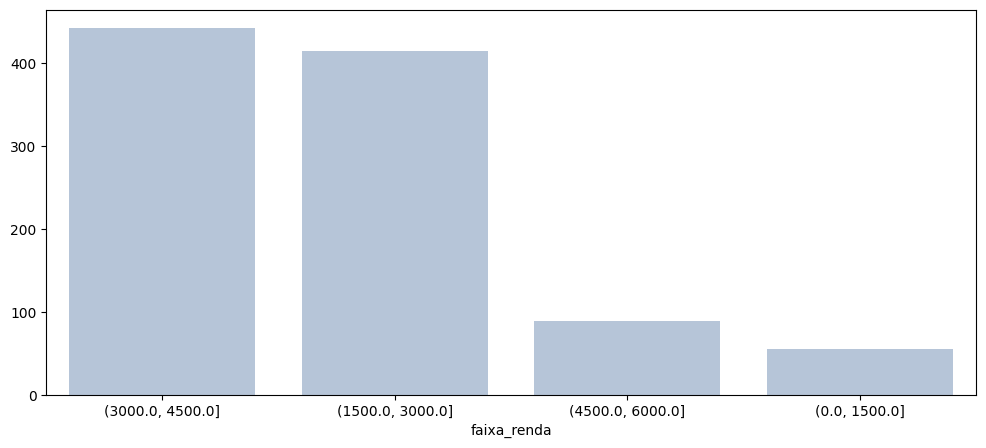

In [7]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["faixa_renda"].value_counts().index.astype(str),
            y=df["faixa_renda"].value_counts().values,
            color="lightsteelblue");


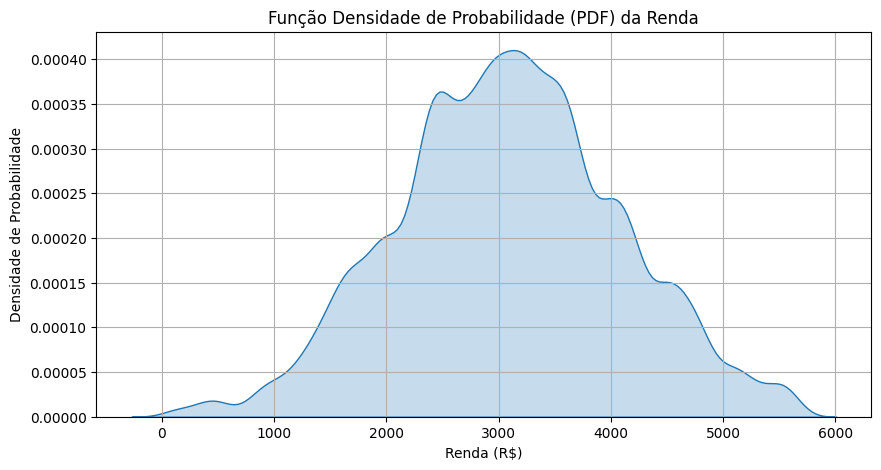

In [8]:
# função densidade de probabilidade
plt.figure(figsize=(10, 5))
sns.kdeplot(df["renda"], bw_adjust=0.5, fill=True)

plt.xlabel("Renda (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.title("Função Densidade de Probabilidade (PDF) da Renda")
plt.grid(True)
plt.show()


### 5.
Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [9]:
media_renda = df["renda"].mean()
variancia_renda = df["renda"].var()

print(f"Média da renda: R$ {media_renda:.2f}")
print(f"Variância da renda: R$ {variancia_renda:.2f}")

Média da renda: R$ 3082.54
Variância da renda: R$ 993156.23


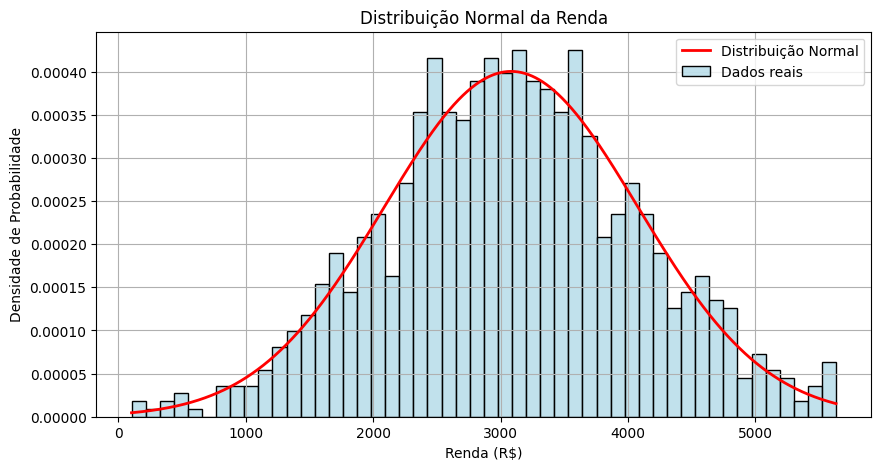

In [10]:
# Criar valores para a distribuição normal
x = np.linspace(df["renda"].min(), df["renda"].max(), 1000)
y = norm.pdf(x, media_renda, np.sqrt(variancia_renda))  # PDF da normal

# Plotar a distribuição normal
plt.figure(figsize=(10, 5))
sns.histplot(df["renda"], bins=50, kde=False, stat="density", color="lightblue", label="Dados reais")
plt.plot(x, y, color="red", label="Distribuição Normal", linewidth=2)

# Configurar o gráfico
plt.xlabel("Renda (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.title("Distribuição Normal da Renda")
plt.legend()
plt.grid()
plt.show()

### 6.
Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [11]:
total_pos = df[df['escolaridade'] == 'Pós-graduação'].shape[0]
prob_pos = total_pos / len(df)
print(f'Probabilidade de pessoas com pós-graduação: {prob_pos:.2f}')

Probabilidade de pessoas com pós-graduação: 0.25


A fórmula da distribuição binomial é dada por:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

Onde:
- P(X = k) é a probabilidade de encontrar exatamente \( k \) sucessos,
- n é o número total de tentativas,
- k é o número de sucessos desejados,
- p é a probabilidade de sucesso em uma tentativa,
- $\binom{n}{k} $ é o coeficiente binomial, calculado como $ \binom{n}{k} = \frac{n!}{k!(n-k)!} $.


In [12]:
p = prob_pos # probabilidade da pessoa ter pós
n = 1000000  # tamanho da amostra
k = 243000   # número de pessoas com pós desejado

prob_pos_243 = stats.binom.pmf(k, n, p)
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_243:.2f}')

Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: 0.00


### 7.
Somando as densidades nós temos a função de densida de acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [13]:
# frequência de cada nível de escolaridade
escolaridade_counts = df["escolaridade"].value_counts(normalize=True).sort_index()
escolaridade_counts

,proportion
escolaridade,
Fundamental,0.266
Médio,0.238
Pós-graduação,0.253
Superior,0.243


In [14]:
# Calcular a densidade acumulada (CDF)
escolaridade_cdf = escolaridade_counts.cumsum()
escolaridade_cdf

,proportion
escolaridade,
Fundamental,0.266
Médio,0.504
Pós-graduação,0.757
Superior,1.000


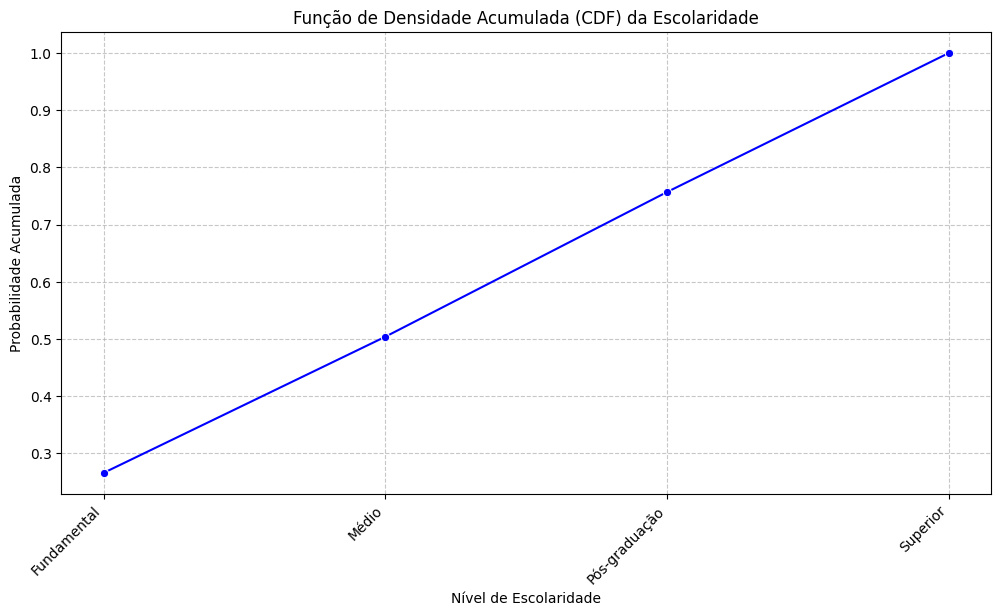

In [15]:
# plotar a CDF
plt.figure(figsize=(12, 6))
sns.lineplot(x=escolaridade_cdf.index, y=escolaridade_cdf.values, marker="o", linestyle="-", color="b")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Nível de Escolaridade")
plt.ylabel("Probabilidade Acumulada")
plt.title("Função de Densidade Acumulada (CDF) da Escolaridade")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()




### 8.
Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês intermediário?

$$
ME = Z \times \sqrt{\frac{\hat{p} (1 - \hat{p})}{n}}
$$


In [16]:
# nível de confiança (95% -> Z = 1.96)
Z = 1.96

# proporção de pessoas com inglês intermediário
total_pessoas = len(df)
pessoas_intermediario = df[df["nível de proficiência em inglês"] == "Intermediário"].shape[0]
p_hat = pessoas_intermediario / total_pessoas

# margem de erro
margem_erro = Z * np.sqrt((p_hat * (1 - p_hat)) / total_pessoas)
margem_erro


np.float64(0.029121603225097343)

### 9.
Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [17]:
# renda média
media_renda = df["renda"].mean()

# proporção de pessoas com renda acima da média + 1000
pessoas_acima_media = df[df["renda"] > (media_renda + 1000)].shape[0]
p_acima_media = pessoas_acima_media / total_pessoas

# parâmetros da binomial
k = 60  # Número de pessoas que queremos encontrar com essa renda

# probabilidade de exatamente 60 pessoas terem essa renda
prob_k_60 = stats.binom.pmf(k, total_pessoas, p_acima_media)
prob_k_60


np.float64(1.099520565163774e-22)

### 10.
Qual é a probabilidade de escolhermos uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais?

In [18]:
# mapeamento de estados para regiões
mapa_regioes = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

df["regiao"] = df["estado"].map(
    {estado: regiao for regiao, estados in mapa_regioes.items() for estado in estados}
)

df.head()


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo,faixa_renda,regiao
0,MA,56,Fundamental,Intermediário,4006.29,F,"(3000.0, 4500.0]",Nordeste
1,BA,46,Superior,Básico,2423.11,M,"(1500.0, 3000.0]",Nordeste
2,AM,32,Fundamental,Intermediário,3835.69,M,"(3000.0, 4500.0]",Norte
3,CE,60,Superior,Básico,1870.29,M,"(1500.0, 3000.0]",Nordeste
4,SE,25,Fundamental,Avançado,3529.80,M,"(3000.0, 4500.0]",Nordeste


In [19]:
# total_sudeste = df[df["regiao"] == "Sudeste"].shape[0]

# Filtrar pessoas que atendem aos critérios
filtro = (df["regiao"] == "Sudeste") & (df["sexo"] == "M") & \
         (df["escolaridade"] == "Fundamental") & (df["renda"] > 2000)

pessoas_criterios = df[filtro].shape[0]

probabilidade = pessoas_criterios / total_pessoas #total_sudeste
probabilidade


0.019